In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt
from utils.plot_stuff import plot_masks
from utils.extract_features import getImagesBasic

In [2]:
# data will be loaded into these
data = {}

In [5]:
def get_all_regions ( root_dir ) :
    files = os.listdir ( root_dir )
    imgnames = [ f[:-2] for f in files if f.endswith ( '.p' ) ]
    for imgn in imgnames :
        x, y = pickle.load(open(os.path.join(root_dir , imgn + '.p' ), 'rb'))
        assert x.shape[0] == y.shape[0]
        assert x.shape[1] == 39
        data[imgn] = (x, y)
get_all_regions("../nyudv2/regions/")

In [6]:
print(f"Loaded {len(data)} images")
pickle.dump(data, open("../nyudv2/all_regions.p", "wb"))

Loaded 1449 images


In [9]:
def plot_ith_masks ( i: str ) :
    image, image_depth, image_hha, image_labelmaps, image_instmaps = getImagesBasic(i)
    bboxes = data[i][0][:, 2:6].astype(int)
    labels = data[i][1]
    scores = data[i][0][:, 1]

    non_garbage = labels != 0
    bboxes, labels, scores = bboxes[non_garbage], labels[non_garbage], scores[non_garbage]

    sorted_indices = np.argsort(scores)[::-1]
    bboxes, labels, scores = bboxes[sorted_indices], labels[sorted_indices], scores[sorted_indices]

    plt.imshow(image)
    plt.title(f"Image {i}")
    plt.axis('off')
    plt.show()

    for (x,y,w,h), label, score in zip(bboxes, labels, scores) :
        output = np.zeros_like(image)
        output[y:y+h, x:x+w] = image[y:y+h, x:x+w]
        plt.imshow(output)
        plt.title(f"{label} | {score:.2f}")
        plt.axis('off')
        plt.show()

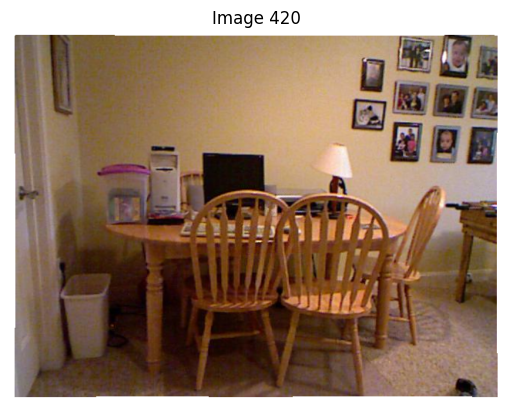

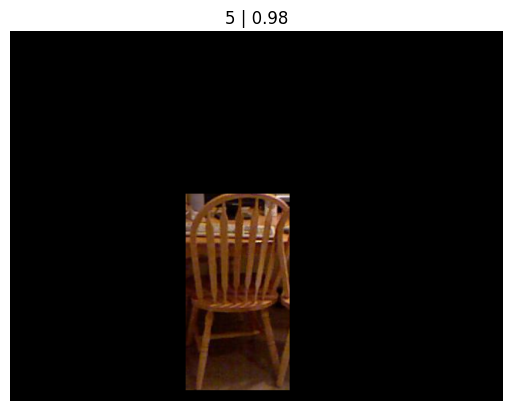

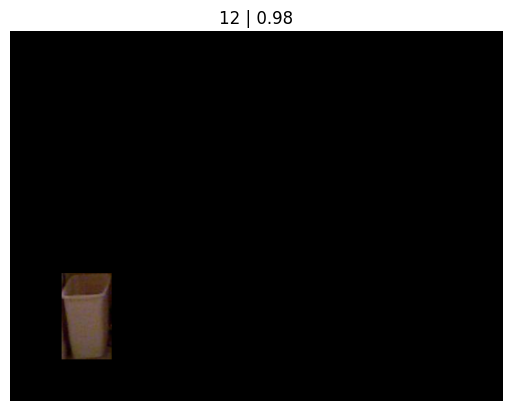

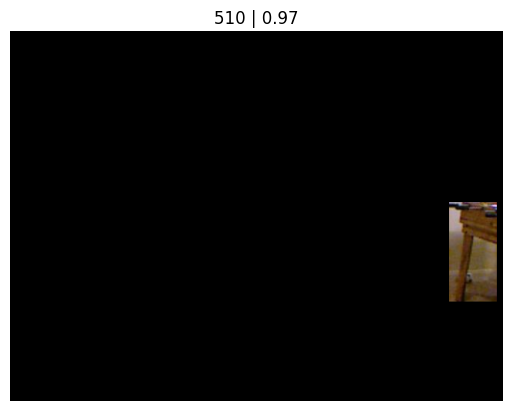

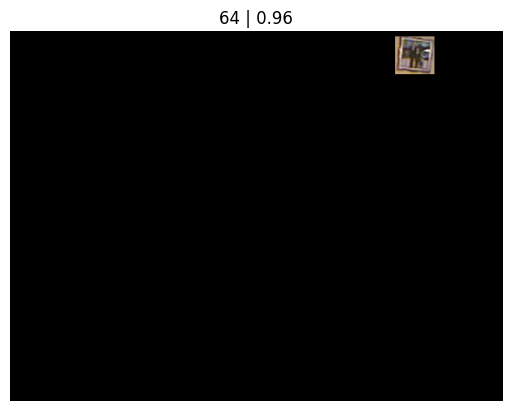

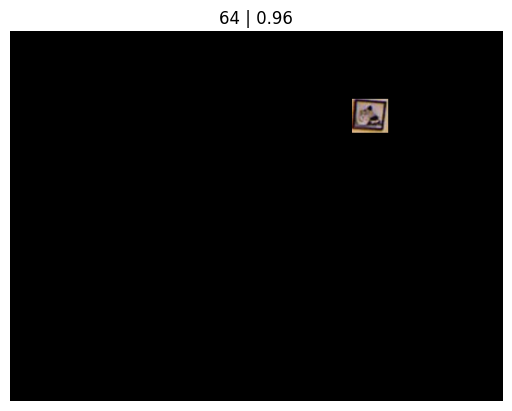

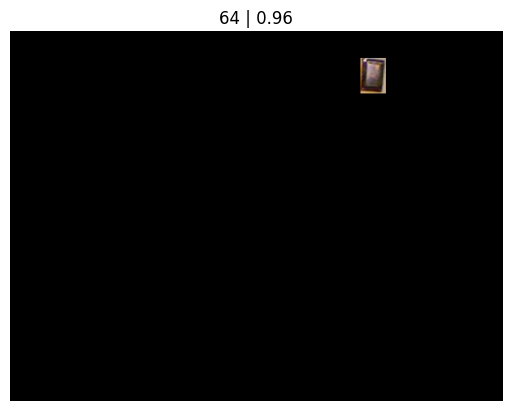

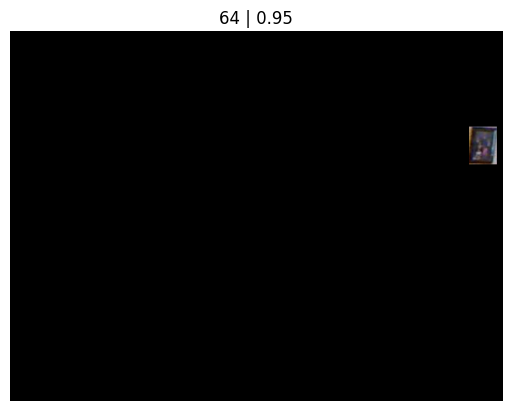

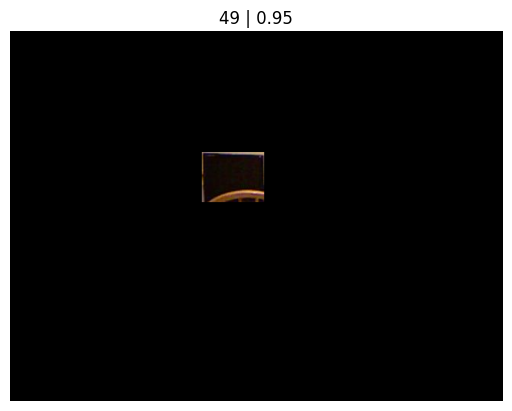

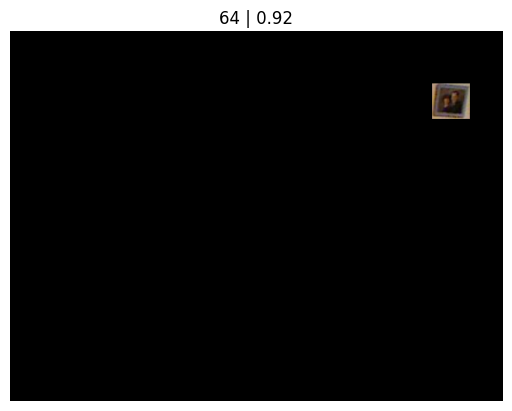

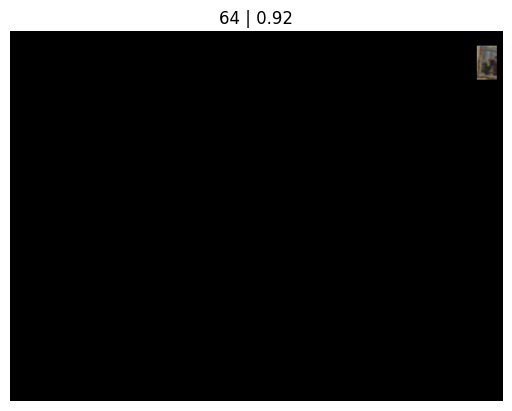

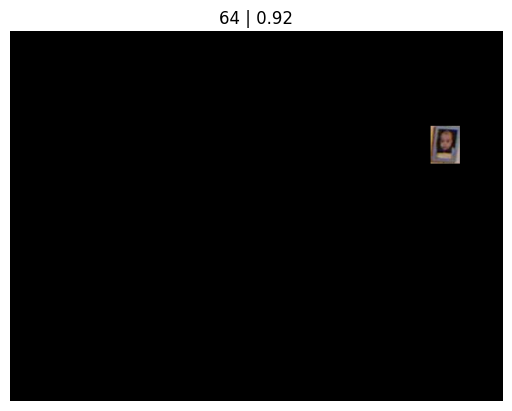

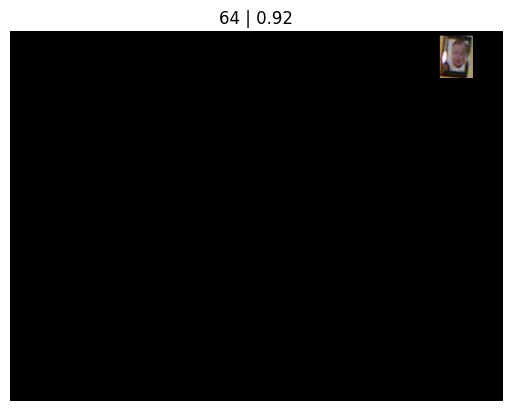

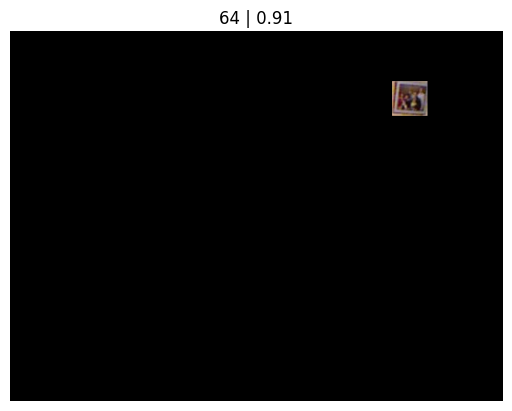

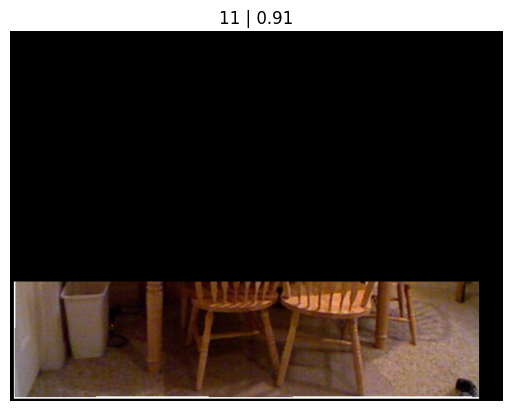

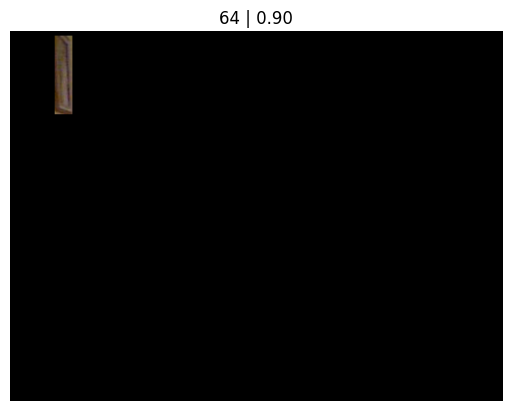

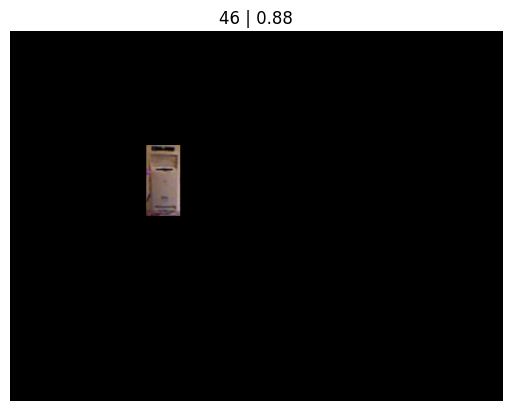

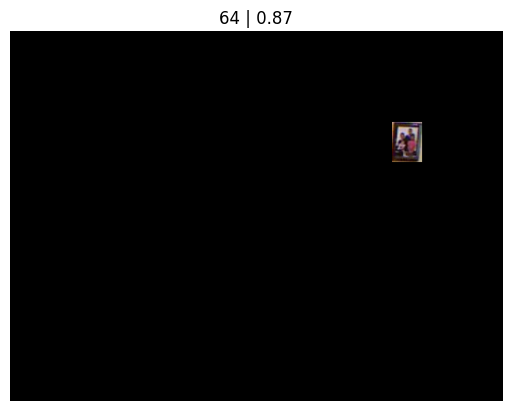

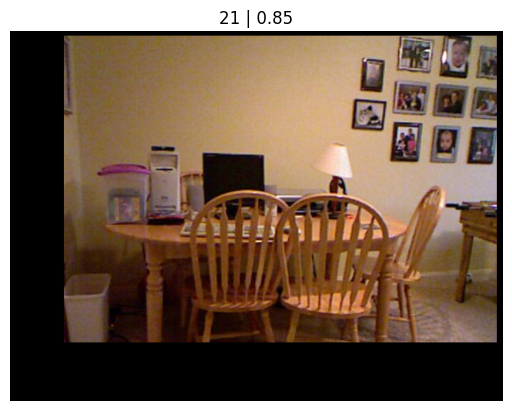

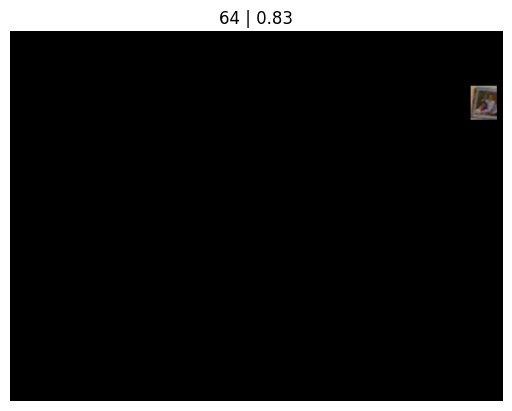

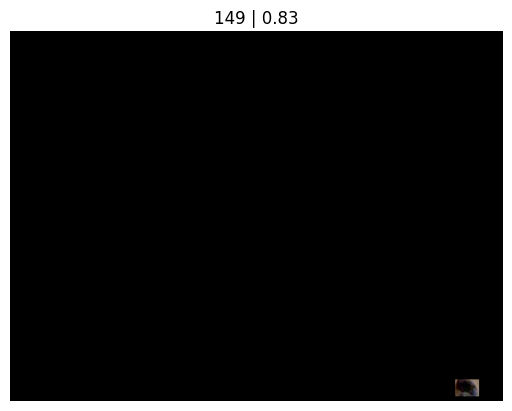

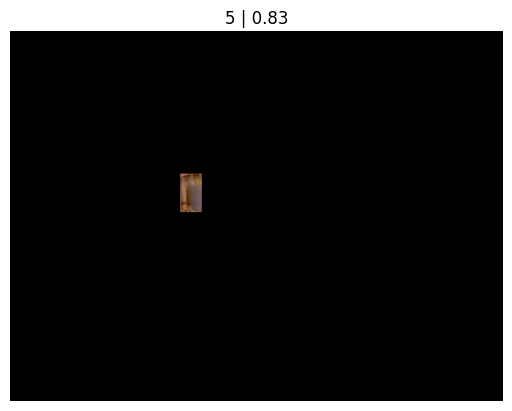

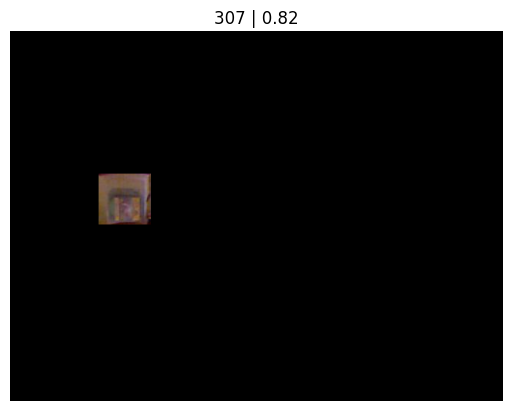

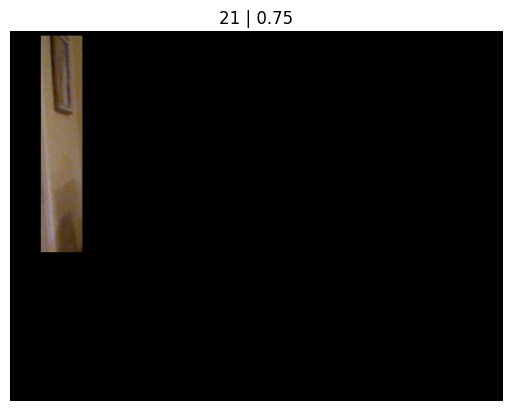

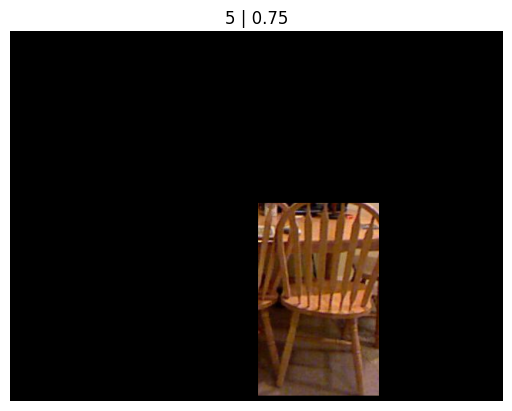

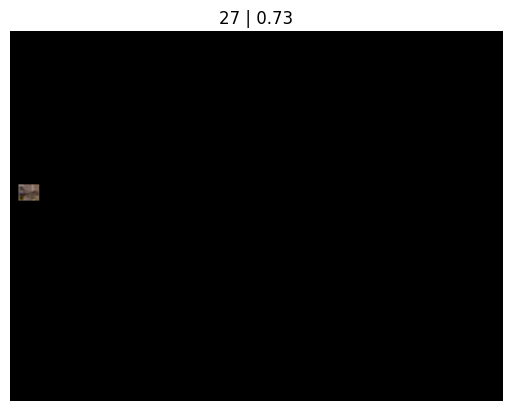

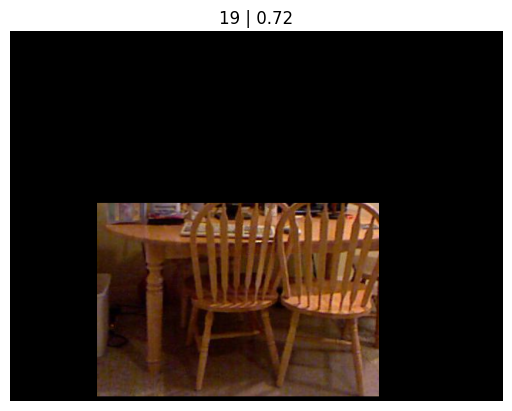

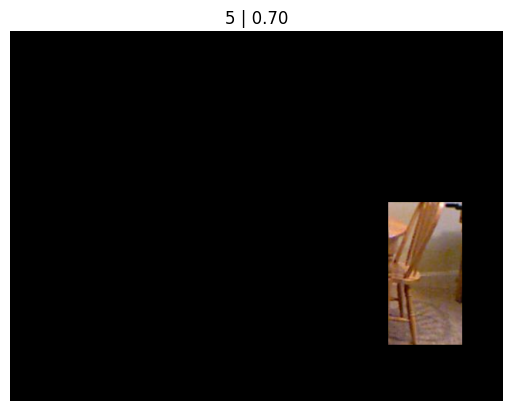

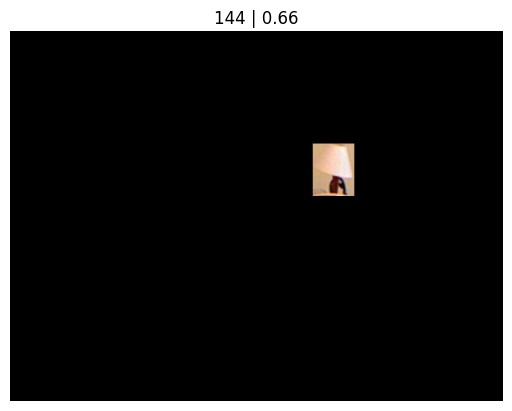

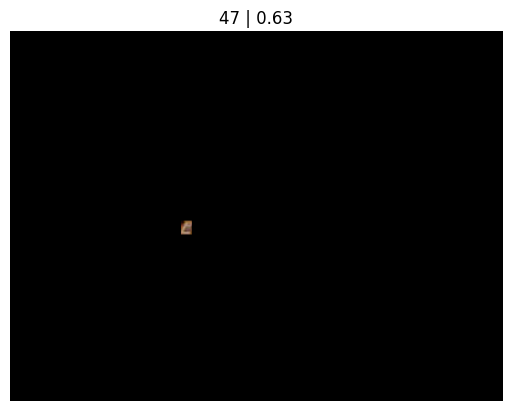

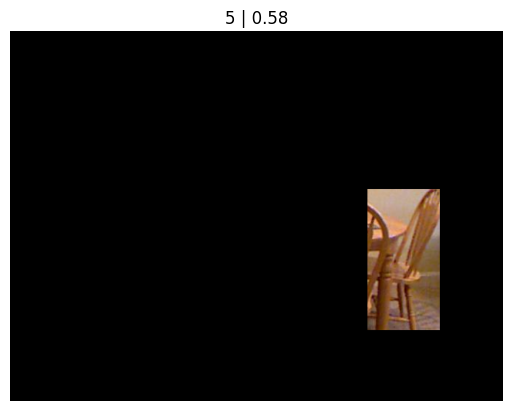

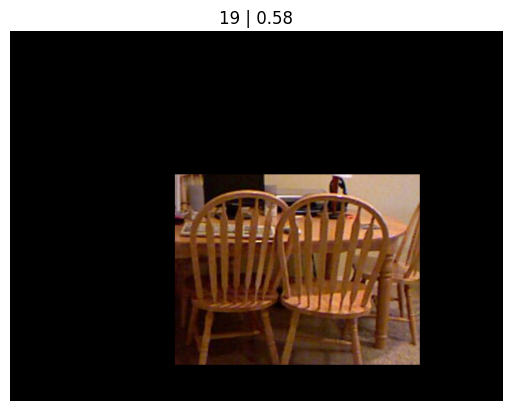

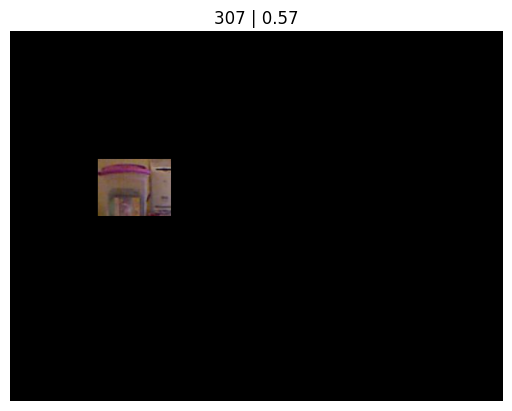

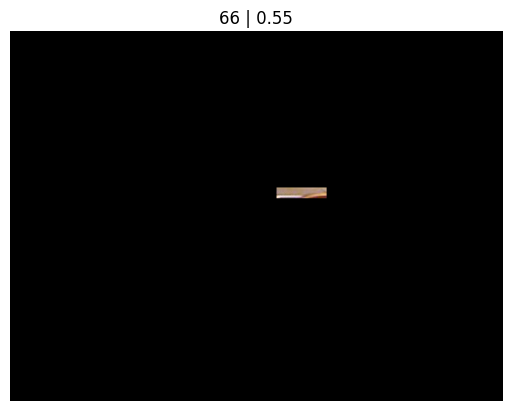

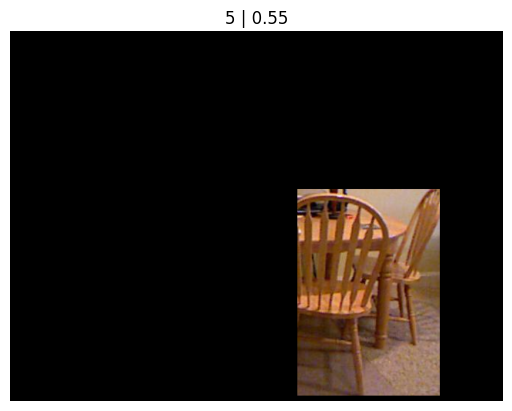

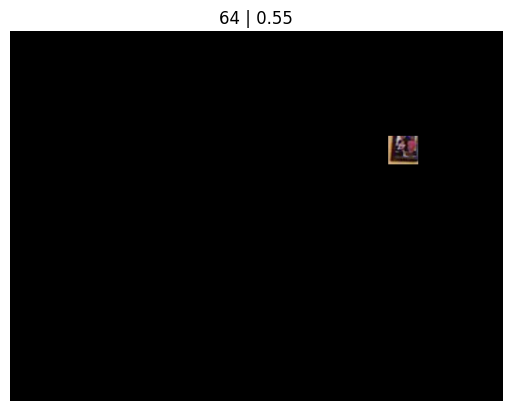

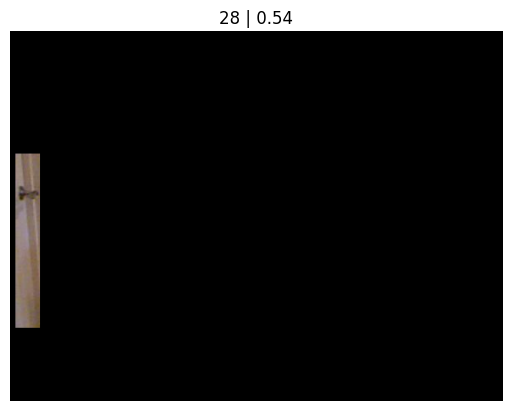

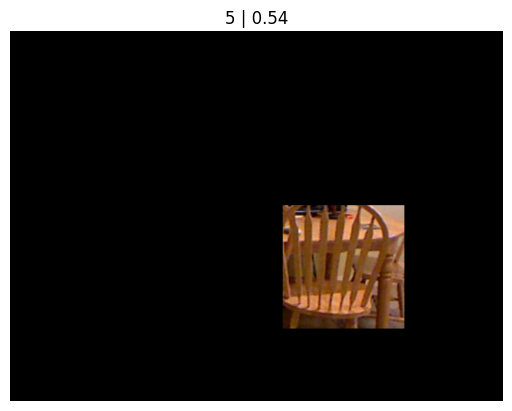

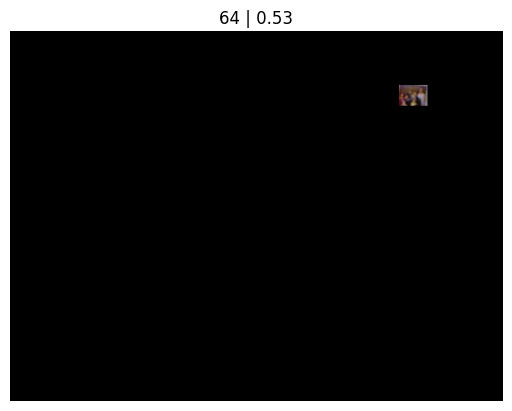

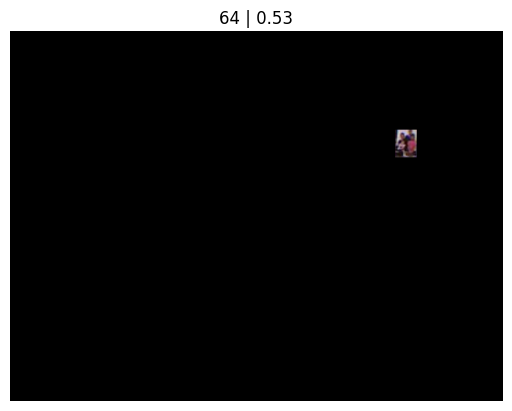

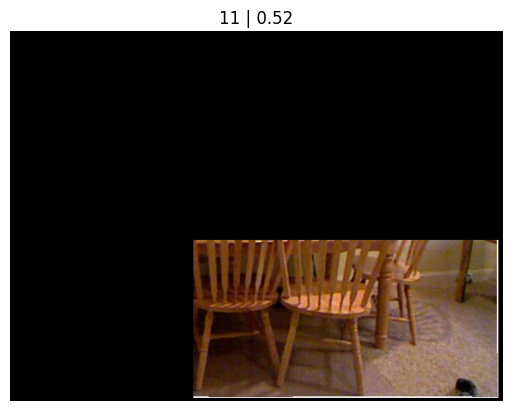

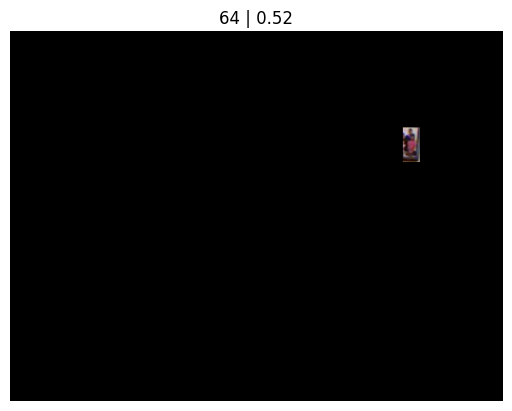

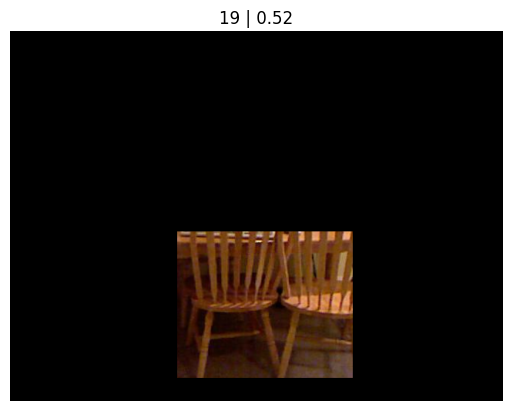

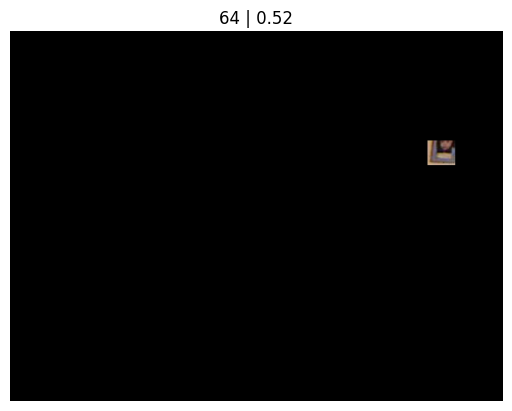

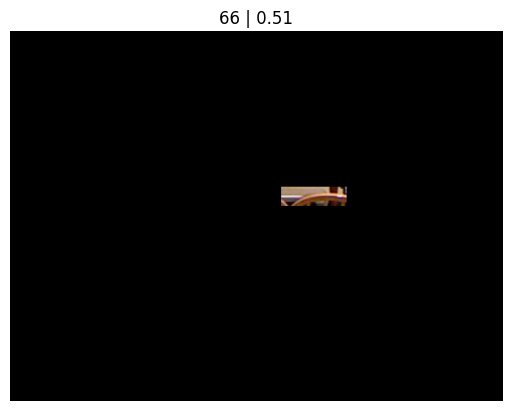

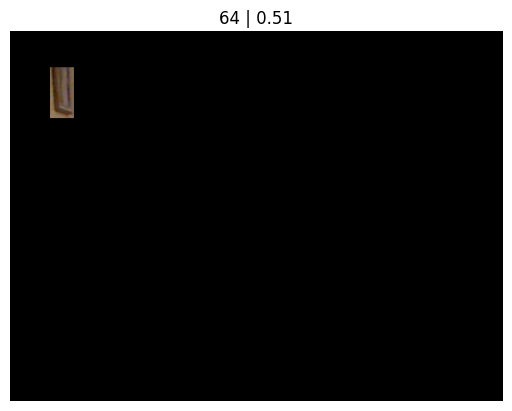

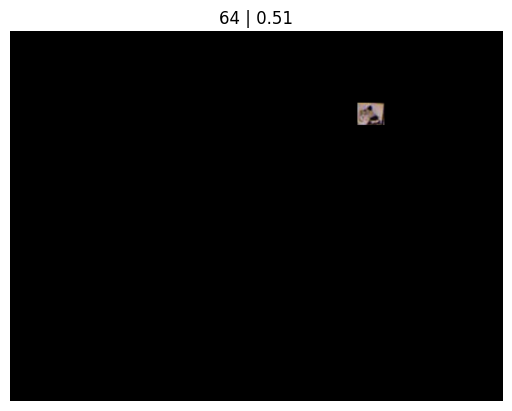

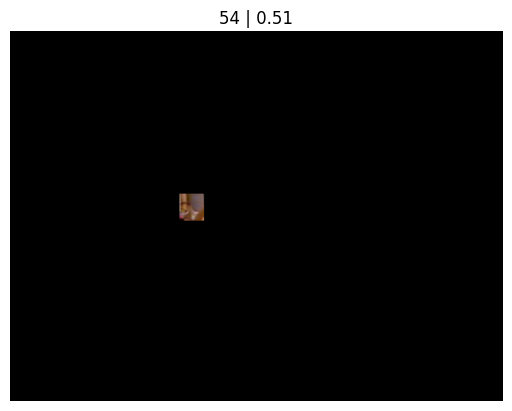

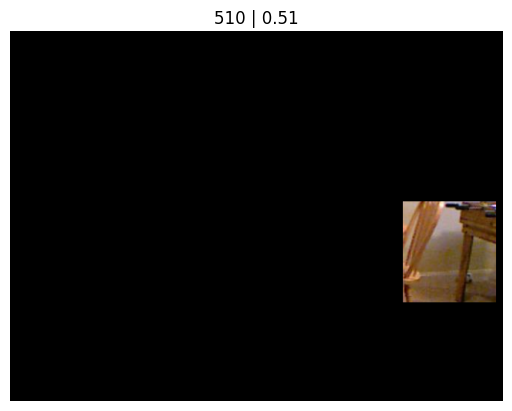

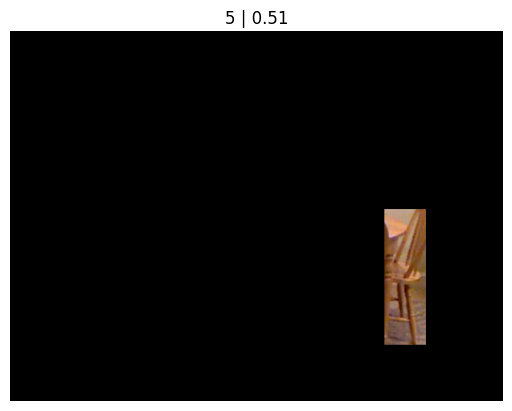

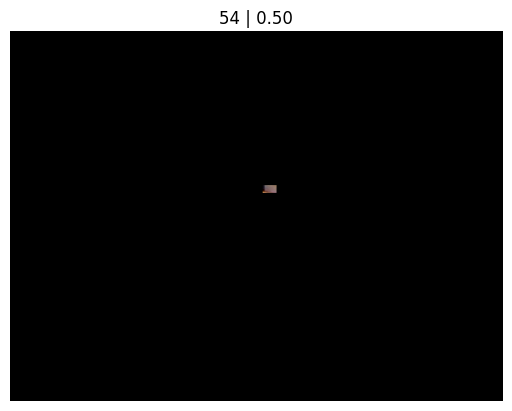

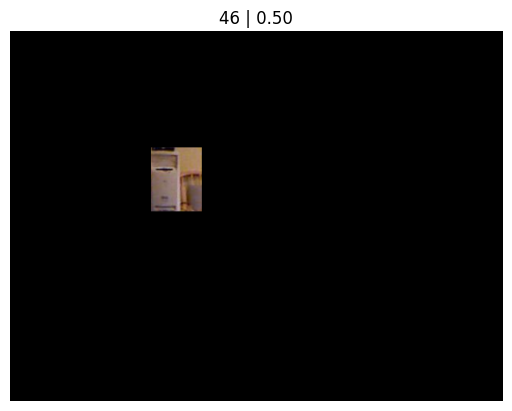

In [10]:
plot_ith_masks('420')